## All algorithms fed different parameters and training sizes over all datasets

In [242]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
conn_sql = sqlite.connect('MasterAll.db')
stroke_c = pd.read_sql('SELECT * FROM stroke_clean', conn_sql)

In [21]:
X = stroke_c[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
      'avg_glucose_level', 'bmi', 'smoking_status']]
y = stroke_c['stroke']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1345
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import time


In [23]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=350, verbose=1).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))


[LibLinear]LogisticRegression: 
 time: 0.114
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

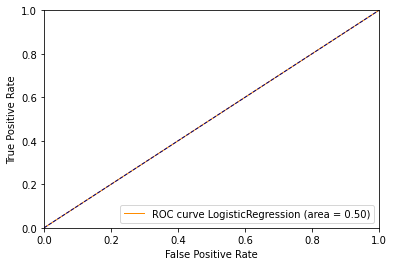

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [7]:
start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=1500, random_state=55).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.292
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

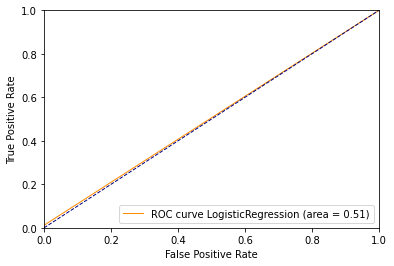

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [28]:
start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.225
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

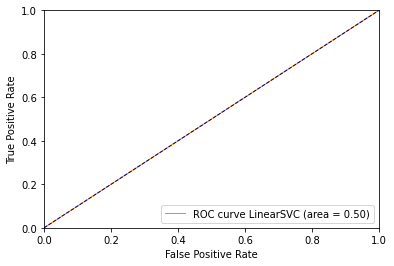

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [47]:
#min diff between 0.25 and 0.3 test_size
#no diff kd_tree and ball_tree
start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=55).fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))



KNeighborsClassifier: 
 time: 0.116
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.31      0.05      0.09        80

    accuracy                           0.94      1533
   macro avg       0.63      0.52      0.53      1533
weighted avg       0.92      0.94      0.93      1533



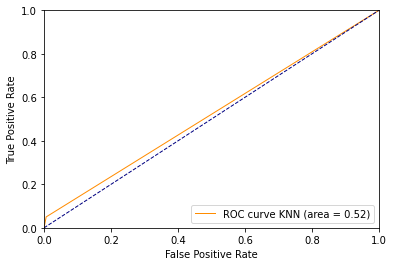

In [48]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [49]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.071
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.31      0.05      0.09        80

    accuracy                           0.94      1533
   macro avg       0.63      0.52      0.53      1533
weighted avg       0.92      0.94      0.93      1533



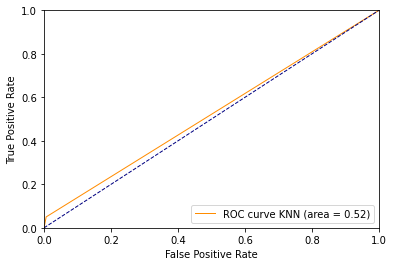

In [50]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [51]:
#best result with criterion='entropy', splitter='random', max_depth=100; (random_state=75 - F1 for 1 = 0.19)
# time: 0.021
#              precision    recall  f1-score   support

#           0       0.96      0.95      0.95      1453
#           1       0.20      0.21      0.21        80

#    accuracy                           0.91      1533
#   macro avg       0.58      0.58      0.58      1533
#weighted avg       0.92      0.91      0.92      1533

#best result wiht only max_depth=15
#  time: 0.033
#               precision    recall  f1-score   support

#            0       0.96      0.96      0.96      1453
#            1       0.22      0.20      0.21        80

#     accuracy                           0.92      1533
#    macro avg       0.59      0.58      0.58      1533
# weighted avg       0.92      0.92      0.92      1533



start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=100).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.013
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1453
           1       0.07      0.07      0.07        80

    accuracy                           0.90      1533
   macro avg       0.51      0.51      0.51      1533
weighted avg       0.90      0.90      0.90      1533



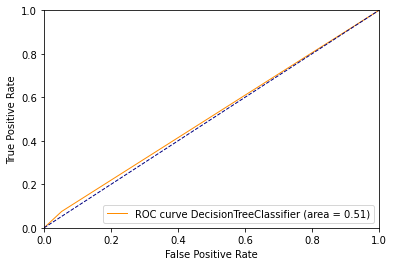

In [52]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [53]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier( max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.026
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1453
           1       0.20      0.19      0.19        80

    accuracy                           0.92      1533
   macro avg       0.58      0.57      0.58      1533
weighted avg       0.92      0.92      0.92      1533



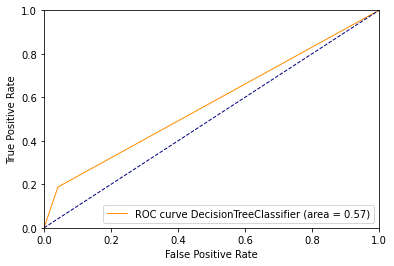

In [54]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [55]:
#with max_depth=30, random_state=2, bootstrap=False
#  time: 0.745
#               precision    recall  f1-score   support

#            0       0.95      0.99      0.97      1453
#            1       0.10      0.01      0.02        80

#     accuracy                           0.94      1533
#    macro avg       0.52      0.50      0.50      1533
# weighted avg       0.90      0.94      0.92      1533

#with max_depth=30
# time: 0.608
#               precision    recall  f1-score   support

#            0       0.95      1.00      0.97      1453
#            1       0.25      0.01      0.02        80

#     accuracy                           0.95      1533
#    macro avg       0.60      0.51      0.50      1533
# weighted avg       0.91      0.95      0.92      1533



start_time_rfc = time.time()
rfc = RandomForestClassifier(max_depth=30).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.457
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



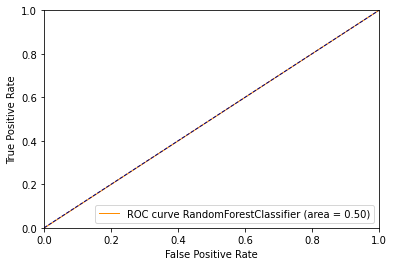

In [56]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [57]:
start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.412
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



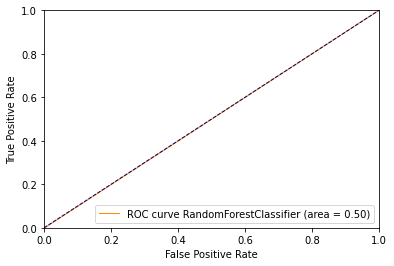

In [58]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [59]:
#max_depth=5, learning_rate=0.9
#  time: 1.120
#               precision    recall  f1-score   support

#            0       0.95      0.97      0.96      1453
#            1       0.26      0.16      0.20        80

#     accuracy                           0.93      1533
#    macro avg       0.61      0.57      0.58      1533
# weighted avg       0.92      0.93      0.92      1533

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(max_depth=5, learning_rate=0.9).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 1.187
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1453
           1       0.27      0.16      0.20        80

    accuracy                           0.93      1533
   macro avg       0.61      0.57      0.58      1533
weighted avg       0.92      0.93      0.93      1533



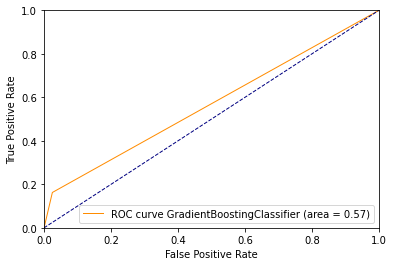

In [60]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [61]:
start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 0.471
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.12      0.03      0.04        80

    accuracy                           0.94      1533
   macro avg       0.54      0.51      0.51      1533
weighted avg       0.91      0.94      0.92      1533



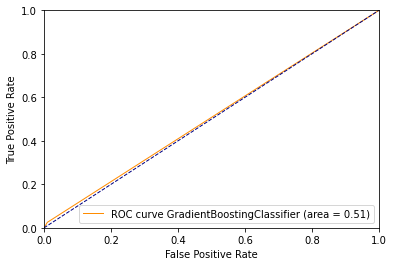

In [62]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hotel_satisfaction

In [236]:
hotel_satisfaction_c = pd.read_sql('SELECT * FROM hotel_satisfaction_clean', conn_sql)
hotel_satisfaction_c.head()

,id,gender,age,purpose_of_travel,type_of_travel,type_of_booking,hotel_wifi_service,departure/arrival__convenience,ease_of_online_booking,hotel_location,food_and_drink,stay_comfort,common_room_entertainment,checkin/checkout_service,other_service,cleanliness,satisfaction
0,70172,1,13,1,1,2,3,4,3,1,5,5,5,4,5,5,0
1,5047,1,25,4,0,0,3,2,3,3,1,1,1,1,4,1,0
2,110028,0,26,4,0,0,2,2,2,2,5,5,5,4,4,5,1
3,24026,0,25,4,0,0,2,5,5,5,2,2,2,1,4,2,0
4,119299,1,61,1,0,0,3,3,3,3,4,5,3,3,3,3,1


In [238]:
#after preprocessing we define our target and features
X = hotel_satisfaction_c[['gender', 'age', 'purpose_of_travel', 'type_of_travel', 'type_of_booking', 'hotel_wifi_service', 'departure/arrival__convenience', 
      'ease_of_online_booking', 'hotel_location', 'food_and_drink', 'stay_comfort', 'common_room_entertainment', 'checkin/checkout_service',
    'other_service', 'cleanliness']]
y = hotel_satisfaction_c['satisfaction']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [65]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))


LogisticRegression: 
 time: 4.448
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     14672
           1       0.81      0.82      0.81     11304

    accuracy                           0.84     25976
   macro avg       0.83      0.84      0.83     25976
weighted avg       0.84      0.84      0.84     25976



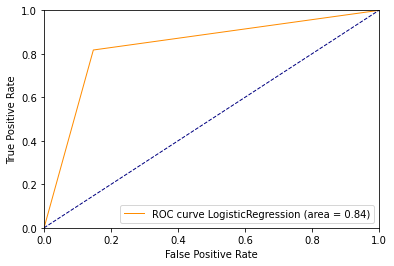

In [66]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [67]:
start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 1.204
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     14672
           1       0.81      0.81      0.81     11304

    accuracy                           0.84     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.84      0.84      0.84     25976



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


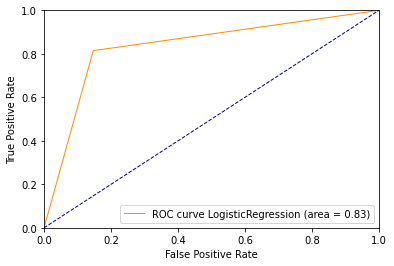

In [68]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [69]:
# bad results with loss=hinge penalty=l2
# time: 129.953
#               precision    recall  f1-score   support

#            0       0.63      0.99      0.77     14672
#            1       0.93      0.24      0.39     11304

#     accuracy                           0.66     25976
#    macro avg       0.78      0.62      0.58     25976
# weighted avg       0.76      0.66      0.60     25976

#best resulst with loss='hinge', but with higher iterations to remove the error slower time
#with max_iter=10000 error still wasn't removed
# time: 94.609
#               precision    recall  f1-score   support

#            0       0.85      0.88      0.86     14672
#            1       0.84      0.79      0.81     11304

#     accuracy                           0.84     25976
#    macro avg       0.84      0.84      0.84     25976
# weighted avg       0.84      0.84      0.84     25976

start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 105.824
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     14672
           1       0.80      0.83      0.81     11304

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.84      0.83      0.84     25976



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


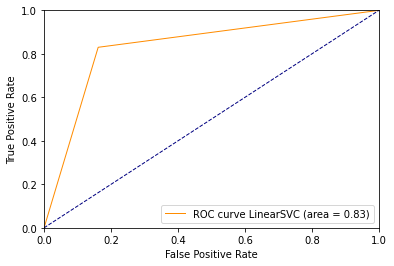

In [70]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [71]:
start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 30.171
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14672
           1       0.81      0.81      0.81     11304

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


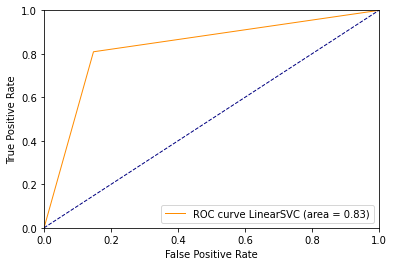

In [72]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [73]:
#min diff between 0.25 and 0.3 test_size
#no diff kd_tree and ball_tree
start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='kd_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 17.598
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     14672
           1       0.89      0.85      0.87     11304

    accuracy                           0.89     25976
   macro avg       0.89      0.88      0.88     25976
weighted avg       0.89      0.89      0.89     25976



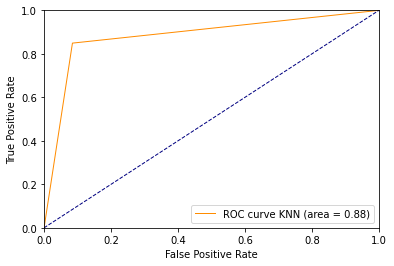

In [74]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [75]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 14.064
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     14672
           1       0.88      0.86      0.87     11304

    accuracy                           0.89     25976
   macro avg       0.89      0.88      0.89     25976
weighted avg       0.89      0.89      0.89     25976



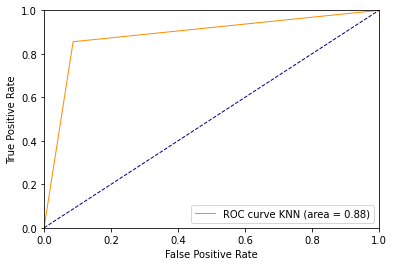

In [76]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [77]:
#niski max_depth smanjuje f1 score
#min diff between 0.25 and 0.3 test_size
#izgleda da samo max_depth utjece na rezulat
#DecisionTreeClassifier: 
# time: 0.190
#              precision    recall  f1-score   support
#
#           0       0.95      0.93      0.94     14672
#           1       0.92      0.93      0.92     11304
#
#    accuracy                           0.93     25976
#   macro avg       0.93      0.93      0.93     25976
#weighted avg       0.93      0.93      0.93     25976

start_time_dtc = time.time()
dtc = DecisionTreeClassifier(max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.492
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14672
           1       0.92      0.93      0.93     11304

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



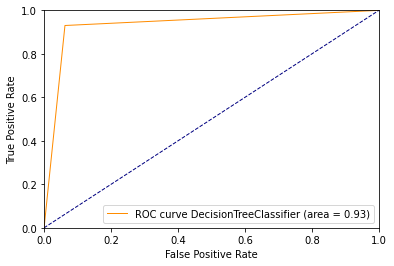

In [78]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [79]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.499
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     14672
           1       0.91      0.92      0.92     11304

    accuracy                           0.93     25976
   macro avg       0.92      0.93      0.92     25976
weighted avg       0.93      0.93      0.93     25976



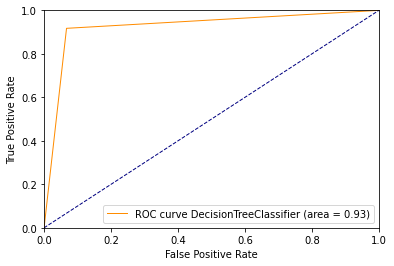

In [80]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [81]:
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 78.654
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14672
           1       0.95      0.93      0.94     11304

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



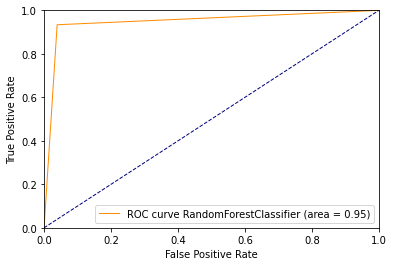

In [82]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [83]:
#min diff between 0.25 and 0.3 test_size
start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 9.374
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14672
           1       0.95      0.93      0.94     11304

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



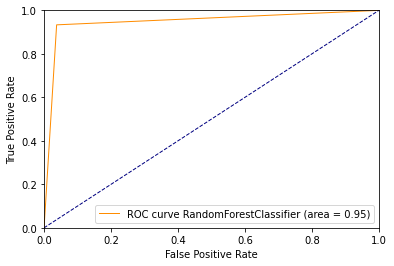

In [84]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [85]:
#tried with loss='exponential' and n_esitmators=150 with no diff/worse results
#test_size=0.25
start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 33.410
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14672
           1       0.95      0.93      0.94     11304

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



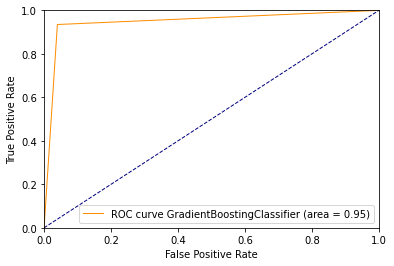

In [86]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [241]:
#test_size=0.25
#best result with max_depth=5, learning_rate=0.4
#  time: 19.618
#               precision    recall  f1-score   support

#            0       0.95      0.96      0.96     14672
#            1       0.95      0.94      0.94     11304

#     accuracy                           0.95     25976
#    macro avg       0.95      0.95      0.95     25976
# weighted avg       0.95      0.95      0.95     25976

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(max_depth=5, learning_rate=0.4).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 20.709
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17651
           1       0.95      0.93      0.94     13521

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172



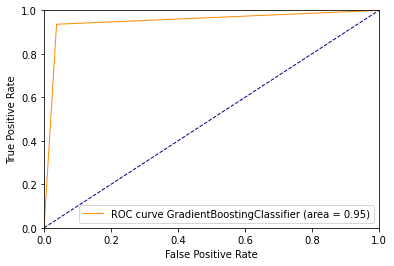

In [88]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hotel booking city

In [11]:
conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_city_c = pd.read_sql('SELECT * FROM hotel_booking_city_clean', conn_sql)
hotel_booking_city_c.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Babies,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,6,0,2,1,0,2,5,3,0,...,0,0,0,0,0,2,0.0,0,0,1
1,1,88,0,4,2,0,0,6,3,0,...,0,0,0,0,0,2,76.5,0,1,0
2,1,65,0,4,1,0,0,6,3,0,...,0,0,0,0,0,2,68.0,0,1,0
3,1,92,2,4,2,0,0,6,3,0,...,0,0,0,0,0,2,76.5,0,2,0
4,1,100,0,2,2,0,0,6,3,0,...,0,0,0,0,0,2,76.5,0,1,0


In [12]:
#after preprocessing we define our target and features
X = hotel_booking_city_c[['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Babies', 'Meal', 
      'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges',
    'DepositType', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus']]
y = hotel_booking_city_c['IsCanceled']

from sklearn.model_selection import train_test_split

test_size = 0.30
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [342]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(penalty='l2', solver='sag', max_iter=350, verbose=1).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 16 seconds
LogisticRegression: 
 time: 16.047
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     13836
           1       0.87      0.61      0.72      9963

    accuracy                           0.80     23799
   macro avg       0.82      0.77      0.78     23799
weighted avg       0.81      0.80      0.79     23799



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


In [13]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 2.498
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13836
           1       1.00      0.97      0.98      9963

    accuracy                           0.99     23799
   macro avg       0.99      0.99      0.99     23799
weighted avg       0.99      0.99      0.99     23799



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#test_size = 0.25
#  time: 150.336
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99     11565
#            1       1.00      0.97      0.99      8268

#     accuracy                           0.99     19833
#    macro avg       0.99      0.99      0.99     19833
# weighted avg       0.99      0.99      0.99     19833

#test_size=0.3
#  time: 146.929
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99     13836
#            1       1.00      0.97      0.99      9963

#     accuracy                           0.99     23799
#    macro avg       0.99      0.99      0.99     23799
# weighted avg       0.99      0.99      0.99     23799

start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=10000, random_state=55).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 146.929
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13836
           1       1.00      0.97      0.99      9963

    accuracy                           0.99     23799
   macro avg       0.99      0.99      0.99     23799
weighted avg       0.99      0.99      0.99     23799



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [16]:
#with test_size=0.25
# time: 16.129
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99     11565
#            1       1.00      0.97      0.98      8268

#     accuracy                           0.99     19833
#    macro avg       0.99      0.98      0.99     19833
# weighted avg       0.99      0.99      0.99     19833

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 16.686
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13836
           1       1.00      0.97      0.99      9963

    accuracy                           0.99     23799
   macro avg       0.99      0.99      0.99     23799
weighted avg       0.99      0.99      0.99     23799



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [18]:
#test_size=0.25
#best result n_neighbors=15, weights='distance', algorithm='kd_tree'
# time: 2.789
#               precision    recall  f1-score   support

#            0       0.84      0.91      0.87     11565
#            1       0.85      0.75      0.80      8268

#     accuracy                           0.84     19833
#    macro avg       0.84      0.83      0.83     19833
# weighted avg       0.84      0.84      0.84     19833

#test_size=0.3
#  time: 11.103
#               precision    recall  f1-score   support

#            0       0.84      0.90      0.87     13836
#            1       0.85      0.76      0.80      9963

#     accuracy                           0.84     23799
#    macro avg       0.84      0.83      0.83     23799
# weighted avg       0.84      0.84      0.84     23799

start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='ball_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 11.103
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     13836
           1       0.85      0.76      0.80      9963

    accuracy                           0.84     23799
   macro avg       0.84      0.83      0.83     23799
weighted avg       0.84      0.84      0.84     23799



In [7]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 50.838
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     11565
           1       0.82      0.74      0.78      8268

    accuracy                           0.82     19833
   macro avg       0.82      0.81      0.82     19833
weighted avg       0.82      0.82      0.82     19833



In [14]:
#no point in changing perimeteres when it's already 1 with default ones 
#same for 0.25/0.30
start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13836
           1       1.00      1.00      1.00      9963

    accuracy                           1.00     23799
   macro avg       1.00      1.00      1.00     23799
weighted avg       1.00      1.00      1.00     23799



In [15]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13836
           1       1.00      1.00      1.00      9963

    accuracy                           1.00     23799
   macro avg       1.00      1.00      1.00     23799
weighted avg       1.00      1.00      1.00     23799



In [9]:
#no point in changing perimeteres when it's already 1 with default ones 
#same for 0.25/0.30
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 31.482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11565
           1       1.00      1.00      1.00      8268

    accuracy                           1.00     19833
   macro avg       1.00      1.00      1.00     19833
weighted avg       1.00      1.00      1.00     19833



In [16]:
start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 4.837
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13836
           1       1.00      1.00      1.00      9963

    accuracy                           1.00     23799
   macro avg       1.00      1.00      1.00     23799
weighted avg       1.00      1.00      1.00     23799



In [11]:
#no point in changing perimeteres when it's already 1 with default ones 
#same for 0.25/0.30
start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 13.632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11565
           1       1.00      1.00      1.00      8268

    accuracy                           1.00     19833
   macro avg       1.00      1.00      1.00     19833
weighted avg       1.00      1.00      1.00     19833



In [17]:
start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 7.407
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13836
           1       1.00      1.00      1.00      9963

    accuracy                           1.00     23799
   macro avg       1.00      1.00      1.00     23799
weighted avg       1.00      1.00      1.00     23799



# Hotel booking_resort

In [3]:
conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_resort_c = pd.read_sql('SELECT * FROM hotel_booking_resort_clean', conn_sql)
hotel_booking_resort_c.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,0,0,2,0,0,2,1,0,...,2,2,3,0,0,2,0.0,0,0,1
1,0,737,0,0,2,0,0,2,1,0,...,2,2,4,0,0,2,0.0,0,0,1
2,0,7,0,1,1,0,0,2,1,0,...,0,2,0,0,0,2,75.0,0,0,1
3,0,13,0,1,1,0,0,1,0,0,...,0,0,0,0,0,2,75.0,0,0,1
4,0,14,0,2,2,0,0,5,2,0,...,0,0,0,0,0,2,98.0,0,1,1


In [4]:
#after preprocessing we define our target and features
X = hotel_booking_resort_c[['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Meal', 
      'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges',
    'DepositType', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus']]
y = hotel_booking_resort_c['IsCanceled']

from sklearn.model_selection import train_test_split

test_size = 0.25
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(penalty='l2', solver='sag', max_iter=350, verbose=1).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 7 seconds
LogisticRegression: 
 time: 6.657
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7264
           1       1.00      0.97      0.99      2751

    accuracy                           0.99     10015
   macro avg       0.99      0.99      0.99     10015
weighted avg       0.99      0.99      0.99     10015



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished


In [8]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(max_iter=1050).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 5.711
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7264
           1       1.00      0.97      0.99      2751

    accuracy                           0.99     10015
   macro avg       1.00      0.99      0.99     10015
weighted avg       0.99      0.99      0.99     10015



In [36]:
start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=3000, random_state=55).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 19.950
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7264
           1       1.00      0.97      0.99      2751

    accuracy                           0.99     10015
   macro avg       1.00      0.99      0.99     10015
weighted avg       0.99      0.99      0.99     10015



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 5.612
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7264
           1       1.00      0.97      0.99      2751

    accuracy                           0.99     10015
   macro avg       0.99      0.99      0.99     10015
weighted avg       0.99      0.99      0.99     10015



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [10]:
#no diff kd_tree / ball_tree
#test_size=0.25
#  time: 2.444
#               precision    recall  f1-score   support

#            0       0.84      0.93      0.88      7264
#            1       0.74      0.54      0.62      2751

#     accuracy                           0.82     10015
#    macro avg       0.79      0.73      0.75     10015
# weighted avg       0.81      0.82      0.81     10015

start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='ball_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 2.511
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7264
           1       0.74      0.54      0.62      2751

    accuracy                           0.82     10015
   macro avg       0.79      0.73      0.75     10015
weighted avg       0.81      0.82      0.81     10015



In [50]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 18.026
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7264
           1       0.64      0.54      0.59      2751

    accuracy                           0.79     10015
   macro avg       0.74      0.71      0.72     10015
weighted avg       0.78      0.79      0.78     10015



In [14]:
#no point in changing perimeteres when it's already 1 with default ones 
#same for 0.25/0.30
start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.020
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7264
           1       1.00      1.00      1.00      2751

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015



In [13]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.038
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7264
           1       1.00      1.00      1.00      2751

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015



In [18]:
start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb


print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

GaussianNB: 
 time: 0.028
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7264
           1       0.97      1.00      0.99      2751

    accuracy                           0.99     10015
   macro avg       0.99      0.99      0.99     10015
weighted avg       0.99      0.99      0.99     10015



In [9]:
#no point in changing perimeteres when it's already 1 with default ones 
#same for 0.25/0.30
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 15.924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7264
           1       1.00      1.00      1.00      2751

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015



In [15]:
start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 1.748
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7264
           1       1.00      1.00      1.00      2751

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015



In [11]:
#no point in changing perimeteres when it's already 1 with default ones 
#same for 0.25/0.30
start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 8.048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7264
           1       1.00      1.00      1.00      2751

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015



In [16]:
start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 2.646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7264
           1       1.00      1.00      1.00      2751

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015



# Coupon recommendation

In [89]:
#conn_sql = sqlite.connect('MasterAll.db')
coupons_c_le = pd.read_sql('SELECT * FROM coupons_clean', conn_sql)
coupons_c_le.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,14,4,24,1,1,2,...,0,1,3,3,1,0,0,0,1,1
1,1,1,2,80,10,2,2,1,1,2,...,0,1,3,3,1,0,0,0,1,0
2,1,1,2,80,10,0,24,1,1,2,...,0,1,3,3,1,0,0,0,1,1
3,1,1,2,80,10,1,2,1,1,2,...,0,1,3,3,1,1,0,0,1,0
4,1,1,2,80,14,2,24,1,1,2,...,0,1,3,3,1,0,0,0,1,0


In [90]:
#after preprocessing we define our target and features
coupons_bar = pd.read_sql('Select * from coupons_clean where coupon = 0', conn_sql)
coupons_restaurant = pd.read_sql('Select * from coupons_clean where coupon in (3,4)', conn_sql)
coupons_carry_away = pd.read_sql('Select * from coupons_clean where coupon = 1', conn_sql)
coupons_coffee = pd.read_sql('Select * from coupons_clean where coupon = 2', conn_sql)

In [91]:
X = coupons_c_le[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y = coupons_c_le['Y']

X_bar = coupons_bar[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'Bar', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_bar = coupons_bar['Y']

X_restaurant = coupons_restaurant[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_restaurant = coupons_restaurant['Y']

X_carry_away = coupons_carry_away[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'CarryAway', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_carry_away = coupons_carry_away['Y']

X_coffee = coupons_coffee[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'CoffeeHouse', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_coffee = coupons_coffee['Y']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1024

## Over all data 

In [92]:
test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [93]:
#small_diff test sizes 0.25 (a bit smaller f1score) / 0.30
start_time_lr = time.time()
lr = LogisticRegression(penalty='l1', solver='liblinear').fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))


LogisticRegression: 
 time: 0.476
              precision    recall  f1-score   support

           0       0.59      0.41      0.49      1541
           1       0.64      0.78      0.71      2083

    accuracy                           0.63      3624
   macro avg       0.61      0.60      0.60      3624
weighted avg       0.62      0.63      0.61      3624



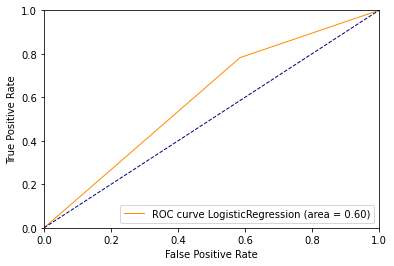

In [94]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

In [95]:
#test_size=0.30
# with loss='hinge', max_iter=3000
#  time: 1.310
#               precision    recall  f1-score   support

#            0       0.58      0.37      0.45      1541
#            1       0.63      0.80      0.71      2083

#     accuracy                           0.62      3624
#    macro avg       0.60      0.58      0.58      3624
# weighted avg       0.61      0.62      0.60      3624
#only with max_iter=3000
#  time: 3.116
#               precision    recall  f1-score   support

#            0       0.61      0.34      0.44      1541
#            1       0.63      0.84      0.72      2083

#     accuracy                           0.63      3624
#    macro avg       0.62      0.59      0.58      3624
# weighted avg       0.62      0.63      0.60      3624

#test_size=0.25 a little smaller f1score
#  time: 1.398
#               precision    recall  f1-score   support

#            0       0.58      0.34      0.43      1279
#            1       0.63      0.82      0.71      1741

#     accuracy                           0.62      3020
#    macro avg       0.60      0.58      0.57      3020
# weighted avg       0.61      0.62      0.59      3020



start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=3000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 1.518
              precision    recall  f1-score   support

           0       0.59      0.34      0.44      1541
           1       0.63      0.82      0.71      2083

    accuracy                           0.62      3624
   macro avg       0.61      0.58      0.57      3624
weighted avg       0.61      0.62      0.60      3624



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


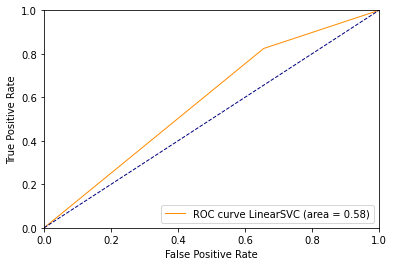

In [96]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [97]:
#test_size=0.25 and max_iter=3000
#  time: 2.029
#               precision    recall  f1-score   support

#            0       0.60      0.36      0.45      1279
#            1       0.64      0.82      0.72      1741

#     accuracy                           0.63      3020
#    macro avg       0.62      0.59      0.59      3020
# weighted avg       0.62      0.63      0.61      3020


start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 1.204
              precision    recall  f1-score   support

           0       0.66      0.23      0.34      1541
           1       0.61      0.91      0.73      2083

    accuracy                           0.62      3624
   macro avg       0.64      0.57      0.54      3624
weighted avg       0.63      0.62      0.57      3624



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


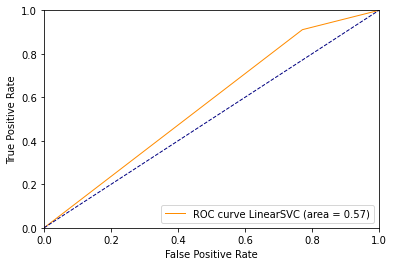

In [98]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [99]:
#test_size=0.30
#no diff kd_tree and ball_tree
#with n_neighbors=25, weights='distance', algorithm='ball_tree'
#  time: 0.431
#               precision    recall  f1-score   support

#            0       0.62      0.46      0.52      1541
#            1       0.66      0.79      0.72      2083

#     accuracy                           0.65      3624
#    macro avg       0.64      0.62      0.62      3624
# weighted avg       0.64      0.65      0.64      3624

#test_size=0.25
#  time: 0.328
#               precision    recall  f1-score   support

#            0       0.64      0.49      0.56      1279
#            1       0.68      0.80      0.74      1741

#     accuracy                           0.67      3020
#    macro avg       0.66      0.65      0.65      3020
# weighted avg       0.66      0.67      0.66      3020

start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='ball_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.455
              precision    recall  f1-score   support

           0       0.64      0.49      0.56      1541
           1       0.68      0.79      0.73      2083

    accuracy                           0.67      3624
   macro avg       0.66      0.64      0.64      3624
weighted avg       0.66      0.67      0.66      3624



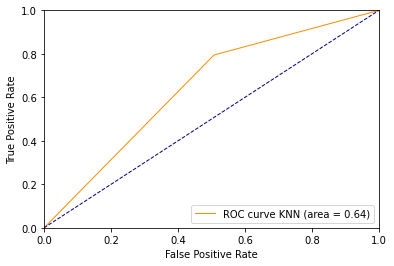

In [100]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [101]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 22.813
              precision    recall  f1-score   support

           0       0.58      0.53      0.56      1541
           1       0.67      0.71      0.69      2083

    accuracy                           0.64      3624
   macro avg       0.63      0.62      0.63      3624
weighted avg       0.63      0.64      0.64      3624



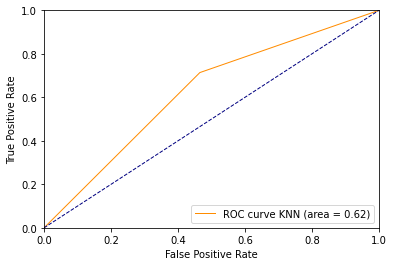

In [102]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [103]:
#test_size = 0.30
#worse results with any other perimeters
# time: 0.015
#               precision    recall  f1-score   support

#            0       0.63      0.52      0.57      1541
#            1       0.69      0.77      0.73      2083

#     accuracy                           0.67      3624
#    macro avg       0.66      0.65      0.65      3624
# weighted avg       0.66      0.67      0.66      3624

#test_size = 0.25
# time: 0.024
#               precision    recall  f1-score   support

#            0       0.72      0.43      0.54      1279
#            1       0.68      0.88      0.77      1741

#     accuracy                           0.69      3020
#    macro avg       0.70      0.66      0.65      3020
# weighted avg       0.70      0.69      0.67      3020

start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.409
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1541
           1       0.70      0.79      0.74      2083

    accuracy                           0.68      3624
   macro avg       0.67      0.66      0.66      3624
weighted avg       0.68      0.68      0.67      3624



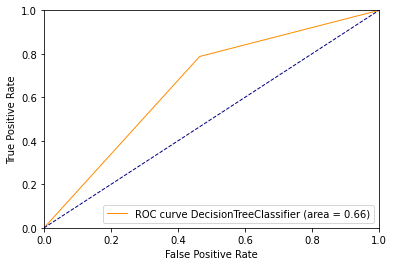

In [104]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [105]:
#slightly better results with test_size=0.25
# time: 0.042
#               precision    recall  f1-score   support

#            0       0.64      0.65      0.64      1279
#            1       0.74      0.73      0.73      1741

#     accuracy                           0.69      3020
#    macro avg       0.69      0.69      0.69      3020
# weighted avg       0.70      0.69      0.70      3020

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.095
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1541
           1       0.73      0.72      0.72      2083

    accuracy                           0.68      3624
   macro avg       0.68      0.68      0.68      3624
weighted avg       0.69      0.68      0.68      3624



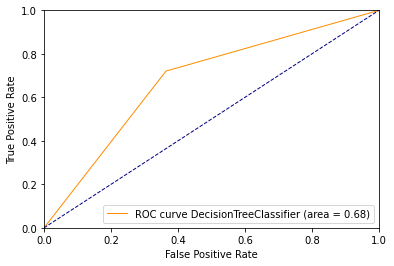

In [106]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [107]:
#test_size=0.3 same result as original with any perimter 
#similar for 0.25/0.30
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=2).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 3.680
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1541
           1       0.76      0.81      0.78      2083

    accuracy                           0.74      3624
   macro avg       0.74      0.73      0.73      3624
weighted avg       0.74      0.74      0.74      3624



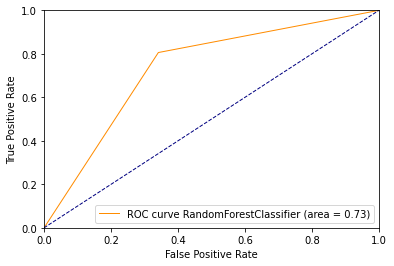

In [108]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [109]:
#min diff between 0.25 and 0.3 test_size
start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 1.875
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1541
           1       0.76      0.80      0.78      2083

    accuracy                           0.75      3624
   macro avg       0.74      0.73      0.74      3624
weighted avg       0.74      0.75      0.74      3624



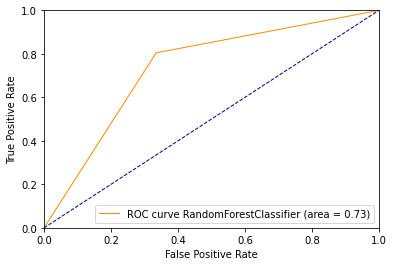

In [110]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [111]:
#test_size=0.30
#with loss='exponential', max_depth=10, learning_rate=0.75, n_estimators=120
#  time: 10.529
#               precision    recall  f1-score   support

#            0       0.72      0.68      0.70      1541
#            1       0.77      0.80      0.79      2083

#     accuracy                           0.75      3624
#    macro avg       0.74      0.74      0.74      3624
# weighted avg       0.75      0.75      0.75      3624
#similar result for test_size=0.25

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=10, learning_rate=0.75, n_estimators=120).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 9.810
              precision    recall  f1-score   support

           0       0.71      0.68      0.70      1541
           1       0.77      0.79      0.78      2083

    accuracy                           0.75      3624
   macro avg       0.74      0.74      0.74      3624
weighted avg       0.75      0.75      0.75      3624



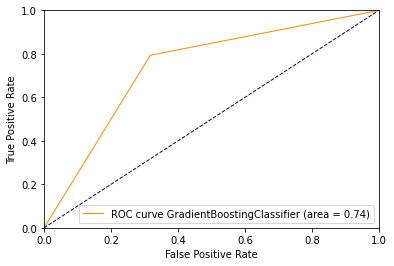

In [112]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [113]:
start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 0.901
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1541
           1       0.73      0.82      0.77      2083

    accuracy                           0.72      3624
   macro avg       0.72      0.70      0.71      3624
weighted avg       0.72      0.72      0.72      3624



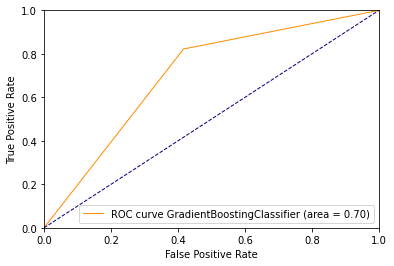

In [114]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Bar

In [115]:
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(X_bar, y_bar, test_size=test_size, random_state=seed)

In [116]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=350, verbose=1).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

[LibLinear]LogisticRegression: 
 time: 0.207
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       333
           1       0.69      0.51      0.59       241

    accuracy                           0.70       574
   macro avg       0.69      0.67      0.67       574
weighted avg       0.70      0.70      0.69       574



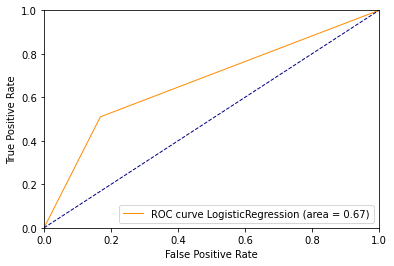

In [117]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [118]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(max_iter=350).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 0.284
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       333
           1       0.68      0.50      0.57       241

    accuracy                           0.69       574
   macro avg       0.69      0.66      0.67       574
weighted avg       0.69      0.69      0.68       574



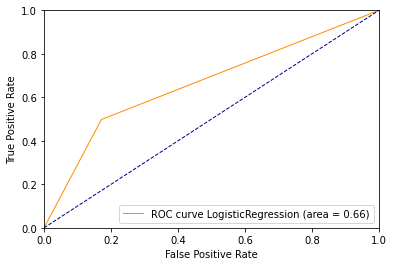

In [119]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [120]:
#test_size = 0.30
#with loss='hinge', max_iter=10000, random_state=55
# time: 0.202
#               precision    recall  f1-score   support

#            0       0.71      0.83      0.76       278
#            1       0.69      0.53      0.60       201

#     accuracy                           0.70       479
#    macro avg       0.70      0.68      0.68       479
# weighted avg       0.70      0.70      0.69       479
start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=10000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.108
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       333
           1       0.69      0.51      0.59       241

    accuracy                           0.70       574
   macro avg       0.69      0.67      0.67       574
weighted avg       0.70      0.70      0.69       574



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


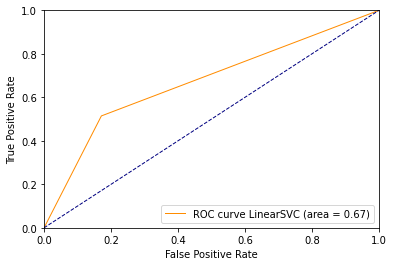

In [121]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [122]:
start_time_svc = time.time()
svc = LinearSVC(max_iter=3000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.190
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       333
           1       0.69      0.46      0.55       241

    accuracy                           0.69       574
   macro avg       0.69      0.66      0.66       574
weighted avg       0.69      0.69      0.67       574



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


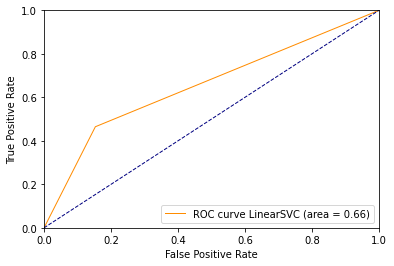

In [123]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [124]:
#no diff kd_tree and ball_tree; min_diff with original
#with n_neighbors=25, weights='distance', algorithm='ball_tree'
#  time: 0.018
#               precision    recall  f1-score   support

#            0       0.70      0.82      0.75       278
#            1       0.67      0.51      0.58       201

#     accuracy                           0.69       479
#    macro avg       0.69      0.67      0.67       479
# weighted avg       0.69      0.69      0.68       479

start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='ball_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.050
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       333
           1       0.69      0.49      0.57       241

    accuracy                           0.69       574
   macro avg       0.69      0.66      0.67       574
weighted avg       0.69      0.69      0.68       574



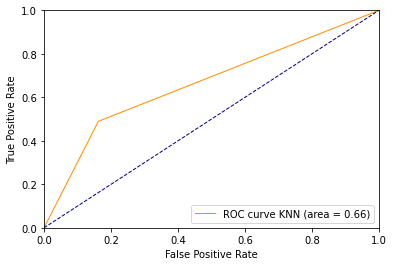

In [125]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [126]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.131
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       333
           1       0.63      0.59      0.61       241

    accuracy                           0.68       574
   macro avg       0.67      0.67      0.67       574
weighted avg       0.68      0.68      0.68       574



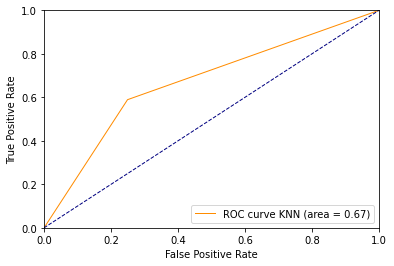

In [127]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [128]:
#with criterion='entropy', splitter='random', max_depth=5
# time: 0.022
#               precision    recall  f1-score   support

#            0       0.75      0.79      0.77       278
#            1       0.69      0.63      0.66       201

#     accuracy                           0.72       479
#    macro avg       0.72      0.71      0.71       479
# weighted avg       0.72      0.72      0.72       479

start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.009
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       333
           1       0.65      0.63      0.64       241

    accuracy                           0.70       574
   macro avg       0.69      0.69      0.69       574
weighted avg       0.70      0.70      0.70       574



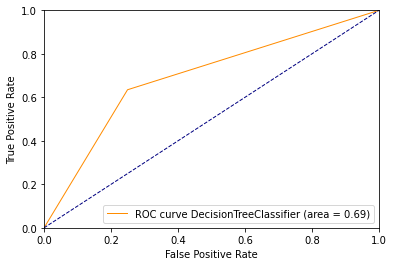

In [129]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [130]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier( max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.011
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       333
           1       0.64      0.62      0.63       241

    accuracy                           0.70       574
   macro avg       0.69      0.68      0.69       574
weighted avg       0.69      0.70      0.69       574



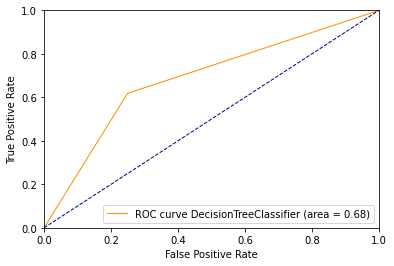

In [131]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [132]:
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 1.830
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       333
           1       0.65      0.64      0.65       241

    accuracy                           0.71       574
   macro avg       0.70      0.70      0.70       574
weighted avg       0.70      0.71      0.71       574



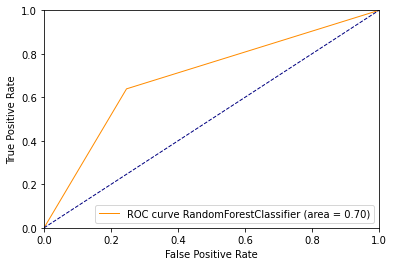

In [133]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [134]:
# time: 0.335
#               precision    recall  f1-score   support

#            0       0.75      0.80      0.77       278
#            1       0.69      0.63      0.66       201

#     accuracy                           0.73       479
#    macro avg       0.72      0.72      0.72       479
# weighted avg       0.73      0.73      0.73       479

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.381
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       333
           1       0.67      0.63      0.65       241

    accuracy                           0.72       574
   macro avg       0.71      0.70      0.71       574
weighted avg       0.71      0.72      0.71       574



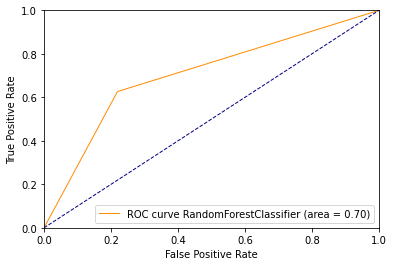

In [135]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [143]:
#loss='exponential', max_depth=5, learning_rate=0.75, n_estimators=150s
# time: 0.702
#               precision    recall  f1-score   support

#            0       0.79      0.82      0.80       278
#            1       0.74      0.69      0.71       201

#     accuracy                           0.77       479
#    macro avg       0.76      0.76      0.76       479
# weighted avg       0.77      0.77      0.77       479

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.75, n_estimators=150).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 0.440
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       333
           1       0.67      0.68      0.67       241

    accuracy                           0.72       574
   macro avg       0.72      0.72      0.72       574
weighted avg       0.73      0.72      0.73       574



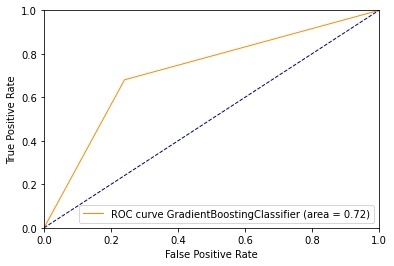

In [137]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [138]:
start_time_gbc = time.time()
gbc = GradientBoostingClassifier(max_depth=5, learning_rate=0.75).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 0.278
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       333
           1       0.71      0.71      0.71       241

    accuracy                           0.76       574
   macro avg       0.75      0.75      0.75       574
weighted avg       0.76      0.76      0.76       574



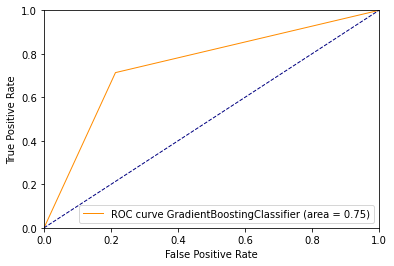

In [139]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## CoffeeHouse 

In [148]:
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(X_coffee, y_coffee, test_size=test_size, random_state=seed)

In [149]:
#solver='liblinear'
#same result as with default parameters
#test_size=0.25 higher by 0.01
start_time_lr = time.time()
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=150).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 0.022
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       383
           1       0.70      0.69      0.69       381

    accuracy                           0.70       764
   macro avg       0.70      0.70      0.70       764
weighted avg       0.70      0.70      0.70       764



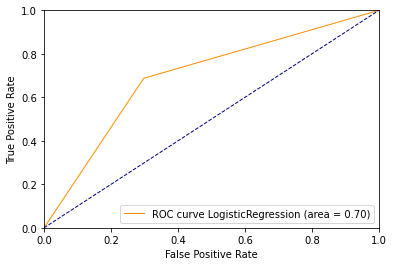

In [150]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [151]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(max_iter=350).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 0.135
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       383
           1       0.70      0.69      0.69       381

    accuracy                           0.70       764
   macro avg       0.70      0.70      0.70       764
weighted avg       0.70      0.70      0.70       764



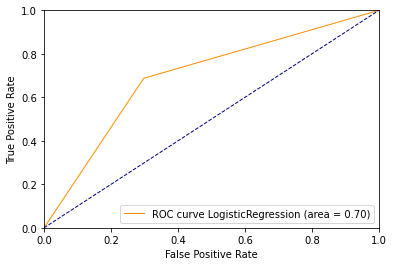

In [152]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [153]:
#with loss='hinge', max_iter=10000
#  time: 0.371
#               precision    recall  f1-score   support

#            0       0.70      0.66      0.68       579
#            1       0.67      0.70      0.69       566

#     accuracy                           0.68      1145
#    macro avg       0.68      0.68      0.68      1145
# weighted avg       0.68      0.68      0.68      1145

#test_size=0.25 higher by 0.01
# time: 0.371
#               precision    recall  f1-score   support

#            0       0.70      0.68      0.69       478
#            1       0.69      0.71      0.70       476

#     accuracy                           0.69       954
#    macro avg       0.69      0.69      0.69       954
# weighted avg       0.69      0.69      0.69       954

start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=10000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.283
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       383
           1       0.69      0.70      0.70       381

    accuracy                           0.70       764
   macro avg       0.70      0.70      0.70       764
weighted avg       0.70      0.70      0.70       764



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


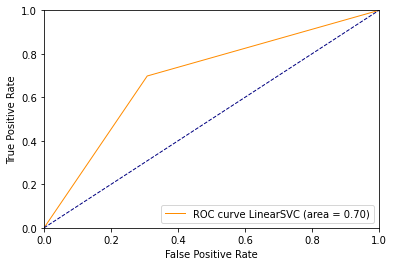

In [154]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [155]:
start_time_svc = time.time()
svc = LinearSVC(max_iter=3000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.459
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       383
           1       0.69      0.71      0.70       381

    accuracy                           0.70       764
   macro avg       0.70      0.70      0.70       764
weighted avg       0.70      0.70      0.69       764



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


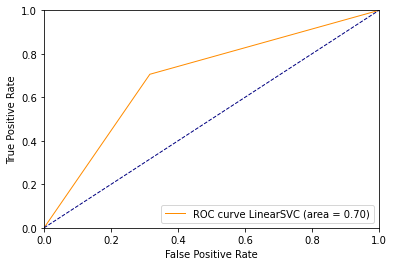

In [156]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [157]:
#no diff kd_tree and ball_tree
#with n_neighbors=15, weights='distance', algorithm='ball_tree'
# time: 0.046
#               precision    recall  f1-score   support

#            0       0.71      0.67      0.69       579
#            1       0.68      0.71      0.70       566

#     accuracy                           0.69      1145
#    macro avg       0.69      0.69      0.69      1145
# weighted avg       0.69      0.69      0.69      1145

#test_size=0.25 similar results

start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='ball_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.032
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       383
           1       0.68      0.72      0.70       381

    accuracy                           0.70       764
   macro avg       0.70      0.70      0.70       764
weighted avg       0.70      0.70      0.70       764



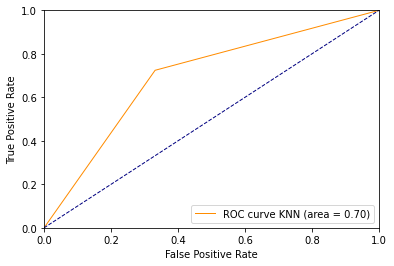

In [158]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [159]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.080
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       383
           1       0.66      0.69      0.67       381

    accuracy                           0.66       764
   macro avg       0.67      0.66      0.66       764
weighted avg       0.67      0.66      0.66       764



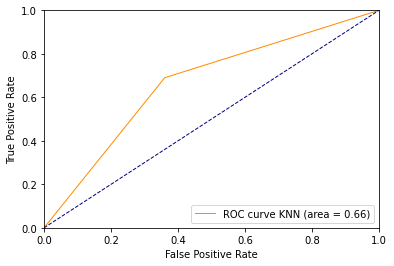

In [160]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [168]:
#with criterion='entropy', splitter='random', max_depth=5
#  time: 0.016
#               precision    recall  f1-score   support

#            0       0.67      0.74      0.71       579
#            1       0.70      0.63      0.67       566

#     accuracy                           0.69      1145
#    macro avg       0.69      0.69      0.69      1145
#weighted avg       0.69      0.69      0.69      1145

#test_size = 0.25
#  time: 0.014
#               precision    recall  f1-score   support

#            0       0.75      0.66      0.70       478
#            1       0.69      0.78      0.73       476

#     accuracy                           0.72       954
#    macro avg       0.72      0.72      0.72       954
# weighted avg       0.72      0.72      0.72       954

test_size=0.25
x_train, x_test, y_train, y_test = train_test_split(X_coffee, y_coffee, test_size=test_size, random_state=seed)

start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.007
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       478
           1       0.67      0.82      0.74       476

    accuracy                           0.71       954
   macro avg       0.72      0.71      0.70       954
weighted avg       0.72      0.71      0.70       954



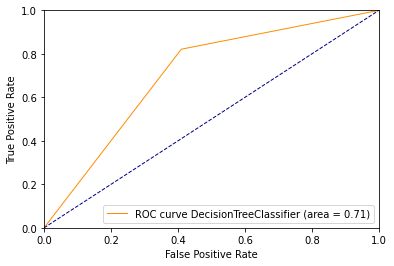

In [169]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [170]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier( max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.016
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       478
           1       0.68      0.65      0.67       476

    accuracy                           0.67       954
   macro avg       0.67      0.67      0.67       954
weighted avg       0.67      0.67      0.67       954



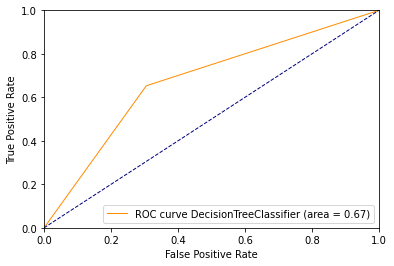

In [171]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [173]:
#no diff between 0.25/0.30
#same as wiht default parameters
test_size=0.20
x_train, x_test, y_train, y_test = train_test_split(X_coffee, y_coffee, test_size=test_size, random_state=seed)
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=2).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.648
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       383
           1       0.70      0.72      0.71       381

    accuracy                           0.71       764
   macro avg       0.71      0.71      0.71       764
weighted avg       0.71      0.71      0.71       764



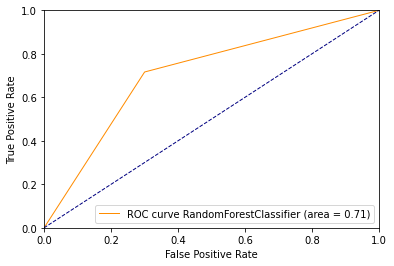

In [174]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [175]:
#min diff between 0.25 and 0.3 test_size
start_time_rfc = time.time()
rfc = RandomForestClassifier(max_depth=25).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.358
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       383
           1       0.71      0.73      0.72       381

    accuracy                           0.72       764
   macro avg       0.72      0.72      0.72       764
weighted avg       0.72      0.72      0.72       764



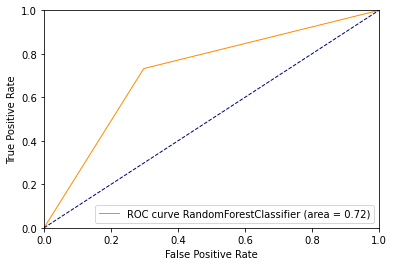

In [176]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [177]:

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=10, learning_rate=0.75, n_estimators=120).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 4.707
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       383
           1       0.72      0.72      0.72       381

    accuracy                           0.73       764
   macro avg       0.73      0.73      0.73       764
weighted avg       0.73      0.73      0.73       764



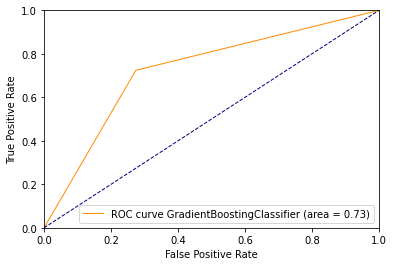

In [178]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [181]:
#test_size=0.30
#with max_depth=10, learning_rate=0.75; similar res as with additional parameters same as without
#  time: 3.756
#               precision    recall  f1-score   support

#            0       0.73      0.71      0.72       579
#            1       0.71      0.73      0.72       566

#     accuracy                           0.72      1145
#    macro avg       0.72      0.72      0.72      1145
# weighted avg       0.72      0.72      0.72      1145

#test_size=0.25 higher by 0.01

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(max_depth=10, learning_rate=0.75).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 4.064
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       383
           1       0.73      0.75      0.74       381

    accuracy                           0.74       764
   macro avg       0.74      0.74      0.74       764
weighted avg       0.74      0.74      0.74       764



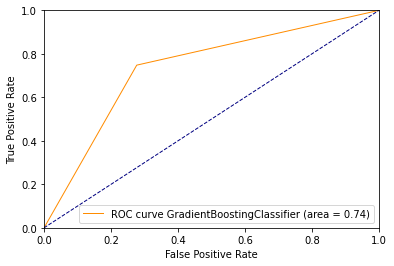

In [182]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## CarryAway 

In [185]:
test_size=0.20
x_train, x_test, y_train, y_test = train_test_split(X_carry_away, y_carry_away, test_size=test_size, random_state=seed)

In [186]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=350, verbose=1).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

[LibLinear]LogisticRegression: 
 time: 0.018
              precision    recall  f1-score   support

           0       0.56      0.09      0.16       109
           1       0.77      0.98      0.86       347

    accuracy                           0.77       456
   macro avg       0.66      0.53      0.51       456
weighted avg       0.72      0.77      0.69       456



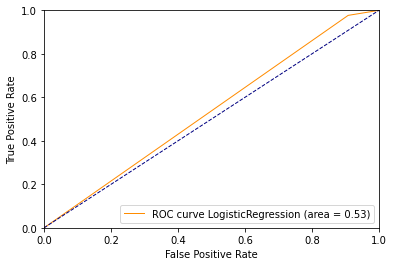

In [187]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [188]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(max_iter=350).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 0.089
              precision    recall  f1-score   support

           0       0.56      0.09      0.16       109
           1       0.77      0.98      0.86       347

    accuracy                           0.77       456
   macro avg       0.66      0.53      0.51       456
weighted avg       0.72      0.77      0.69       456



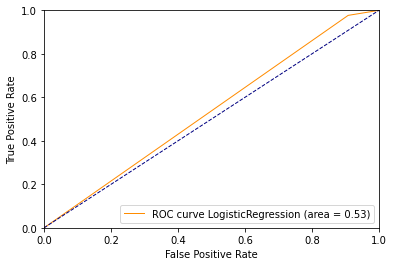

In [189]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [190]:
start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=10000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.059
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.76      1.00      0.86       347

    accuracy                           0.76       456
   macro avg       0.38      0.50      0.43       456
weighted avg       0.58      0.76      0.66       456



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

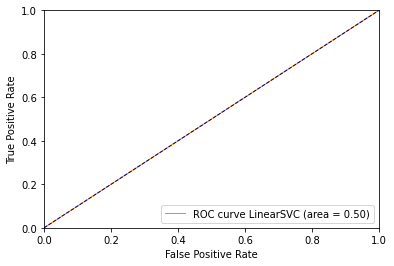

In [191]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [192]:
start_time_svc = time.time()
svc = LinearSVC(max_iter=3000).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.276
              precision    recall  f1-score   support

           0       0.47      0.08      0.14       109
           1       0.77      0.97      0.86       347

    accuracy                           0.76       456
   macro avg       0.62      0.53      0.50       456
weighted avg       0.70      0.76      0.69       456



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


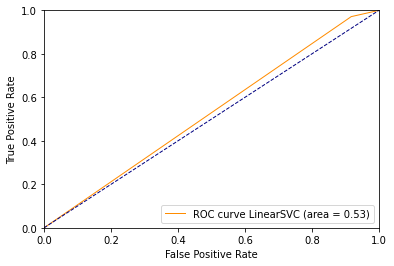

In [193]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [194]:
#test_size=0.30
#n_neighbors=15, weights='distance', algorithm='kd_tree'
#  time: 0.024
#               precision    recall  f1-score   support

#            0       0.52      0.24      0.33       171
#            1       0.79      0.93      0.85       513

#     accuracy                           0.75       684
#    macro avg       0.65      0.58      0.59       684
# weighted avg       0.72      0.75      0.72       684

start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='kd_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.030
              precision    recall  f1-score   support

           0       0.59      0.25      0.35       109
           1       0.80      0.95      0.87       347

    accuracy                           0.78       456
   macro avg       0.69      0.60      0.61       456
weighted avg       0.75      0.78      0.74       456



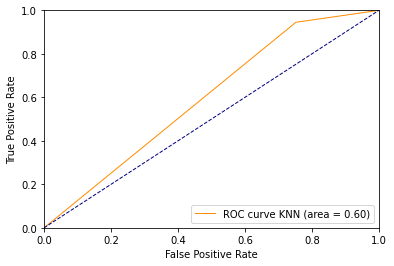

In [195]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [196]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.033
              precision    recall  f1-score   support

           0       0.39      0.21      0.27       109
           1       0.78      0.90      0.84       347

    accuracy                           0.73       456
   macro avg       0.59      0.55      0.55       456
weighted avg       0.69      0.73      0.70       456



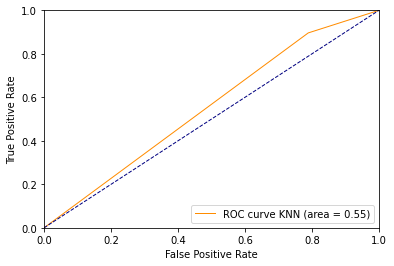

In [197]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [198]:
#simialr res with default pars
start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=25).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.101
              precision    recall  f1-score   support

           0       0.34      0.37      0.35       109
           1       0.80      0.78      0.79       347

    accuracy                           0.68       456
   macro avg       0.57      0.57      0.57       456
weighted avg       0.69      0.68      0.68       456



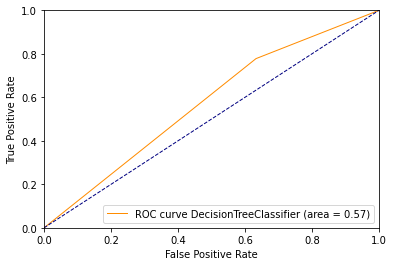

In [199]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [200]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier( max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.013
              precision    recall  f1-score   support

           0       0.33      0.46      0.39       109
           1       0.81      0.71      0.76       347

    accuracy                           0.65       456
   macro avg       0.57      0.59      0.57       456
weighted avg       0.69      0.65      0.67       456



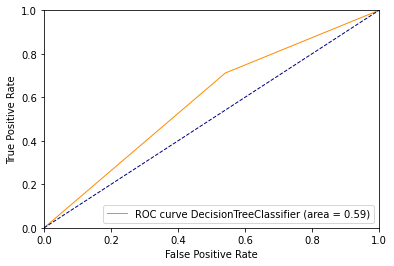

In [201]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [202]:
# test_size=0.30
#with n_estimators=500, max_depth=30, bootstrap=False
# time: 1.316
#               precision    recall  f1-score   support

#            0       0.40      0.31      0.35       171
#            1       0.79      0.84      0.81       513

#     accuracy                           0.71       684
#    macro avg       0.59      0.58      0.58       684
# weighted avg       0.69      0.71      0.70       684

start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=500, max_depth=30, bootstrap=False).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 1.403
              precision    recall  f1-score   support

           0       0.43      0.29      0.35       109
           1       0.80      0.88      0.84       347

    accuracy                           0.74       456
   macro avg       0.61      0.58      0.59       456
weighted avg       0.71      0.74      0.72       456



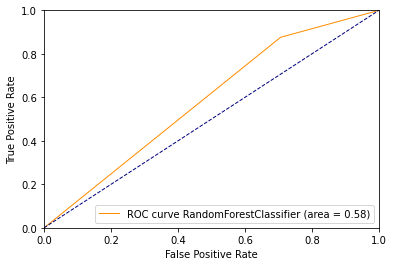

In [203]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [204]:
#min diff between 0.25 and 0.3 test_size
start_time_rfc = time.time()
rfc = RandomForestClassifier(max_depth=25).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.414
              precision    recall  f1-score   support

           0       0.43      0.24      0.31       109
           1       0.79      0.90      0.84       347

    accuracy                           0.74       456
   macro avg       0.61      0.57      0.58       456
weighted avg       0.71      0.74      0.71       456



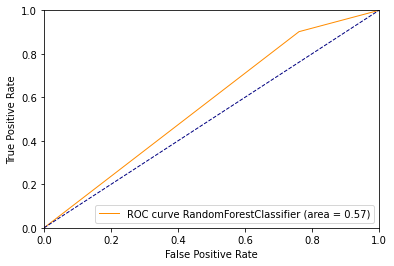

In [205]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [206]:

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=15, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 7.278
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       109
           1       0.80      0.85      0.83       347

    accuracy                           0.73       456
   macro avg       0.60      0.59      0.59       456
weighted avg       0.71      0.73      0.71       456



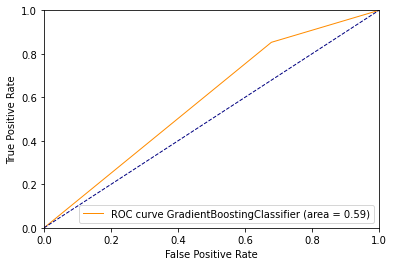

In [207]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [209]:
# with max_depth=5, learning_rate=0.4
# time: 0.515
#               precision    recall  f1-score   support

#            0       0.45      0.36      0.40       171
#            1       0.80      0.85      0.83       513

#     accuracy                           0.73       684
#    macro avg       0.63      0.61      0.61       684
# weighted avg       0.71      0.73      0.72       684

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(max_depth=5, learning_rate=0.4).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 0.340
              precision    recall  f1-score   support

           0       0.43      0.34      0.38       109
           1       0.80      0.86      0.83       347

    accuracy                           0.73       456
   macro avg       0.62      0.60      0.60       456
weighted avg       0.71      0.73      0.72       456



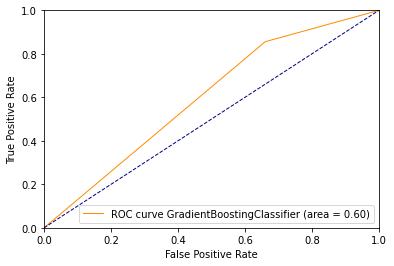

In [210]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Restaurants 

In [211]:
test_size=0.25
x_train, x_test, y_train, y_test = train_test_split(X_restaurant, y_restaurant, test_size=test_size, random_state=seed)

In [212]:
#same res as def pars
#test_size = 0.25 higher f1 by 0.01
start_time_lr = time.time()
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=350, verbose=1).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

[LibLinear]LogisticRegression: 
 time: 0.036
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       414
           1       0.72      0.86      0.78       604

    accuracy                           0.72      1018
   macro avg       0.72      0.68      0.69      1018
weighted avg       0.72      0.72      0.70      1018



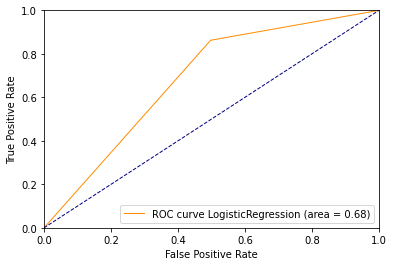

In [213]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [214]:
#solver='liblinear'

start_time_lr = time.time()
lr = LogisticRegression(max_iter=350).fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

print(f"LogisticRegression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

LogisticRegression: 
 time: 0.429
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       414
           1       0.72      0.85      0.78       604

    accuracy                           0.71      1018
   macro avg       0.71      0.68      0.68      1018
weighted avg       0.71      0.71      0.70      1018



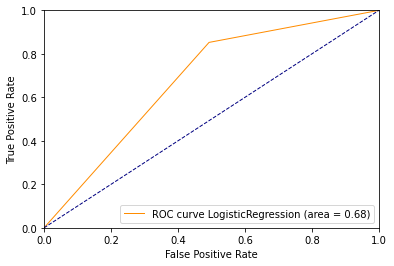

In [215]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_lr)
auc_lr = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LogisticRegression (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [216]:
#with loss='hinge', max_iter=10000, random_state=55
#higher overall f1 score
# time: 0.412
#               precision    recall  f1-score   support

#            0       0.70      0.46      0.55       490
#            1       0.71      0.87      0.78       731

#     accuracy                           0.71      1221
#    macro avg       0.70      0.66      0.67      1221
# weighted avg       0.71      0.71      0.69      1221

start_time_svc = time.time()
svc = LinearSVC(loss='hinge', max_iter=10000, random_state=55).fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.424
              precision    recall  f1-score   support

           0       0.71      0.47      0.56       414
           1       0.70      0.87      0.78       604

    accuracy                           0.71      1018
   macro avg       0.71      0.67      0.67      1018
weighted avg       0.71      0.71      0.69      1018



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


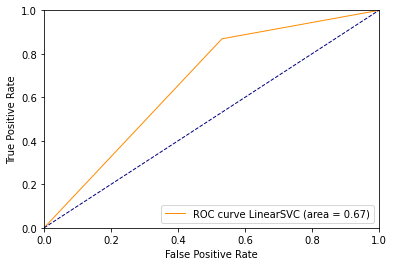

In [217]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [218]:
start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

LinearSVC: 
 time: 0.259
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       414
           1       0.77      0.62      0.69       604

    accuracy                           0.66      1018
   macro avg       0.67      0.67      0.66      1018
weighted avg       0.69      0.66      0.67      1018



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


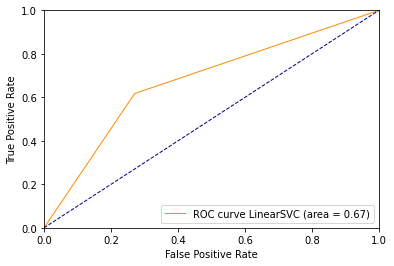

In [219]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
auc_svc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve LinearSVC (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [220]:
#better res with def pars wehn test_size=0.30

#test_size=0.25 higher overall f1 score
# time: 0.056
#               precision    recall  f1-score   support

#            0       0.72      0.38      0.50       414
#            1       0.68      0.90      0.77       604

#     accuracy                           0.69      1018
#    macro avg       0.70      0.64      0.63      1018
# weighted avg       0.69      0.69      0.66      1018
start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=25, weights='distance', algorithm='ball_tree').fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.037
              precision    recall  f1-score   support

           0       0.72      0.38      0.50       414
           1       0.68      0.90      0.77       604

    accuracy                           0.69      1018
   macro avg       0.70      0.64      0.63      1018
weighted avg       0.69      0.69      0.66      1018



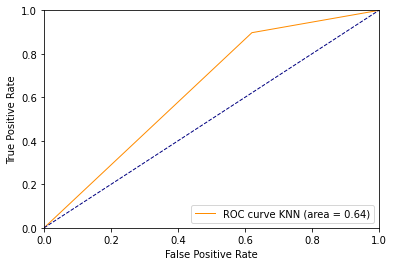

In [221]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [222]:
start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn
print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

KNeighborsClassifier: 
 time: 0.094
              precision    recall  f1-score   support

           0       0.65      0.43      0.52       414
           1       0.68      0.84      0.75       604

    accuracy                           0.67      1018
   macro avg       0.67      0.64      0.64      1018
weighted avg       0.67      0.67      0.66      1018



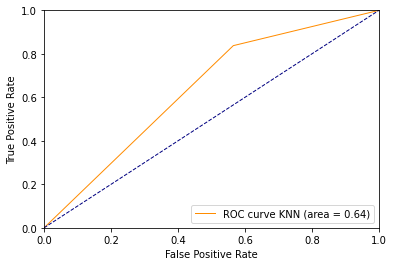

In [223]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_knn)
auc_knn = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve KNN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [224]:
#hiher overall f1 score with test_size=0.30
#with criterion='entropy', splitter='random', max_depth=5
# time: 0.015
#               precision    recall  f1-score   support

#            0       0.66      0.45      0.53       490
#            1       0.70      0.85      0.76       731

#     accuracy                           0.69      1221
#    macro avg       0.68      0.65      0.65      1221
# weighted avg       0.68      0.69      0.67      1221

start_time_dtc = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.013
              precision    recall  f1-score   support

           0       0.63      0.51      0.57       414
           1       0.70      0.79      0.75       604

    accuracy                           0.68      1018
   macro avg       0.67      0.65      0.66      1018
weighted avg       0.67      0.68      0.67      1018



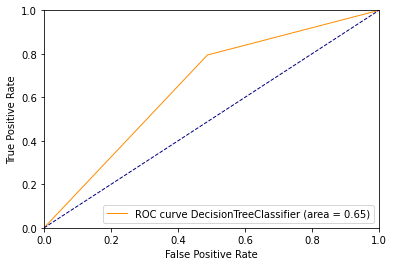

In [225]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [226]:
start_time_dtc = time.time()
dtc = DecisionTreeClassifier( max_depth=15).fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc
print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

DecisionTreeClassifier: 
 time: 0.013
              precision    recall  f1-score   support

           0       0.59      0.56      0.57       414
           1       0.71      0.73      0.72       604

    accuracy                           0.66      1018
   macro avg       0.65      0.64      0.65      1018
weighted avg       0.66      0.66      0.66      1018



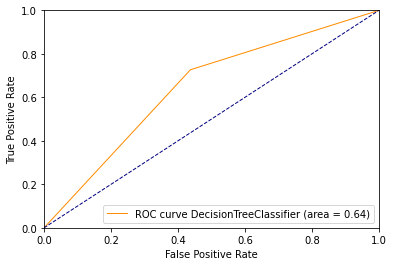

In [227]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtc)
auc_dtc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve DecisionTreeClassifier (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [228]:
#worse res than with def pars with both test_sizes
start_time_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=150, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.988
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       414
           1       0.73      0.76      0.74       604

    accuracy                           0.69      1018
   macro avg       0.68      0.68      0.68      1018
weighted avg       0.69      0.69      0.69      1018



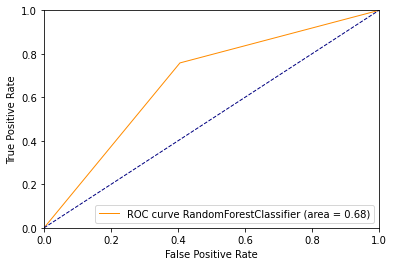

In [229]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [230]:

start_time_rfc = time.time()
rfc = RandomForestClassifier(max_depth=25).fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

RandomForestClassifier: 
 time: 0.556
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       414
           1       0.73      0.78      0.75       604

    accuracy                           0.70      1018
   macro avg       0.69      0.68      0.68      1018
weighted avg       0.70      0.70      0.70      1018



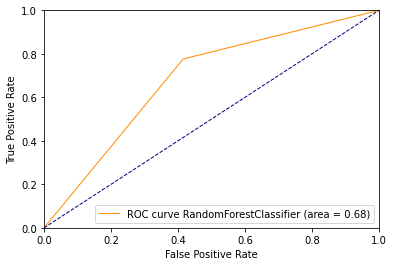

In [231]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_rfc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [232]:
#worse res than with def pars with both test_sizes
start_time_gbc = time.time()
gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 1.489
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       414
           1       0.74      0.77      0.75       604

    accuracy                           0.70      1018
   macro avg       0.69      0.68      0.68      1018
weighted avg       0.70      0.70      0.70      1018



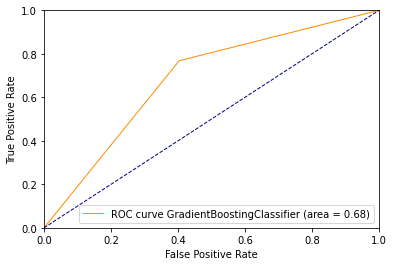

In [233]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [234]:

start_time_gbc = time.time()
gbc = GradientBoostingClassifier(max_depth=15, learning_rate=0.75).fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc
print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

GradientBoostingClassifier: 
 time: 7.815
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       414
           1       0.76      0.73      0.74       604

    accuracy                           0.70      1018
   macro avg       0.69      0.69      0.69      1018
weighted avg       0.70      0.70      0.70      1018



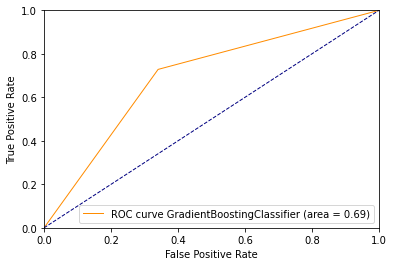

In [235]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_gbc)
auc_gbc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve GradientBoostingClassifier (area = %0.2f)' % auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()